# Inaugural Project #



By Mathilde Maix & Nina Frandsen Jensen

Imports:

In [118]:
#Import 
from types import SimpleNamespace

import numpy as np
from scipy import optimize

import pandas as pd 
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

from inauguralproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1 #

We demonstrate the variability of the following expression as alpha and sigma values change, assuming a discrete choice set for the model in half-hour intervals.
$$
H_F/H_M
$$
The expression represents the correlation between female and male involvement in household work.

In [119]:
resultsx = {}

# Defining lists alpha and sigma 
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# Using the defined lists of values for sigma and alpha to solve the model 
for alpha in alpha_list:    
    for sigma in sigma_list:
        # Assigning values to alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma

        # Solving the model
        opt = model.solve_discrete()
        resultsx[(alpha, sigma)] = opt.HF / opt.HM
        
        # Print 
        print(f"alpha = {alpha:.2f}, sigma = {sigma:.2f} -> HF/HM = {opt.HF:.2f}/{opt.HM:.2f} = {opt.HF/opt.HM:.2f}")
    

alpha = 0.25, sigma = 0.50 -> HF/HM = 3.00/5.50 = 0.55
alpha = 0.25, sigma = 1.00 -> HF/HM = 2.00/6.50 = 0.31
alpha = 0.25, sigma = 1.50 -> HF/HM = 1.50/7.00 = 0.21
alpha = 0.50, sigma = 0.50 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.50, sigma = 1.00 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.50, sigma = 1.50 -> HF/HM = 4.50/4.50 = 1.00
alpha = 0.75, sigma = 0.50 -> HF/HM = 5.50/3.00 = 1.83
alpha = 0.75, sigma = 1.00 -> HF/HM = 6.50/2.00 = 3.25
alpha = 0.75, sigma = 1.50 -> HF/HM = 7.00/1.50 = 4.67


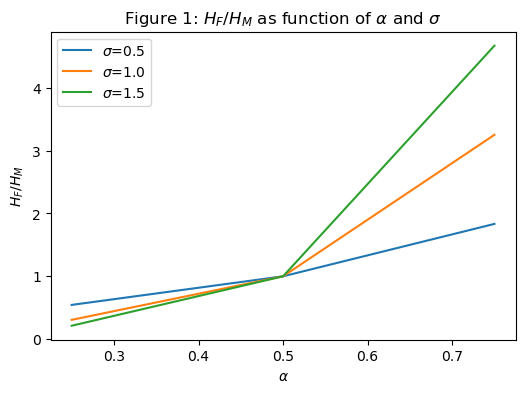

In [120]:

# Plotting optimal HF/HM against alpha for each sigma using a loop
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

# Loop over sigma-values
for sigma in sigma_list:
    y = [resultsx[(alpha, sigma)] for alpha in alpha_list]
    ax.plot(alpha_list, y, label=f'$\sigma$={sigma}')

ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$H_F/H_M$')
ax.set_title('Figure 1: $H_F/H_M$ as function of $\\alpha$ and $\\sigma$')
ax.legend(prop={'size': 10})
plt.show()


$\alpha$ represents the relative productivity of females compared to males in the household, while $\sigma$ represents the elasticity of substitution. From this analysis, we conclude:
* $\alpha=0.5$: Males and females are equally productive, and the $\sigma$ value has no impact. This is because there is no benefit or advantage in substituting between home production tasks performed by males or females. 

* $\alpha>0.5$: Females are more productive than males, and for wF = wM = 1, the female will work do more household work compared to the male.

* $\alpha<0.5$: Females are less productive than males, and for wF = wM = 1, the female will work do less household work compared to the male.

When $\sigma$ is higher, it becomes easier to interchange the hours worked by the male and female at home. If $\alpha$ is above 0.5, a higher $\sigma$ leads to a larger ratio of female-to-male hours. If $\alpha$ is below 0.5, the ratio is smaller. This happens because a higher $\sigma$ allows the couple to assign more household work hours to the more productive member.

# Question 2 #

We create a plot comparing logarithmic functions against each other while using different values for the female wage.
$$ log\frac{H_F}{H_M} log\frac{w_F}{w_M}$$


 For Wf = 0.80: HF = 5.00, HM = 4.00, and log(HF/HM) = 0.223144
 For Wf = 0.90: HF = 4.50, HM = 4.50, and log(HF/HM) = 0.000000
 For Wf = 1.00: HF = 4.50, HM = 4.50, and log(HF/HM) = 0.000000
 For Wf = 1.10: HF = 4.00, HM = 4.50, and log(HF/HM) = -0.117783
 For Wf = 1.20: HF = 4.00, HM = 5.00, and log(HF/HM) = -0.223144


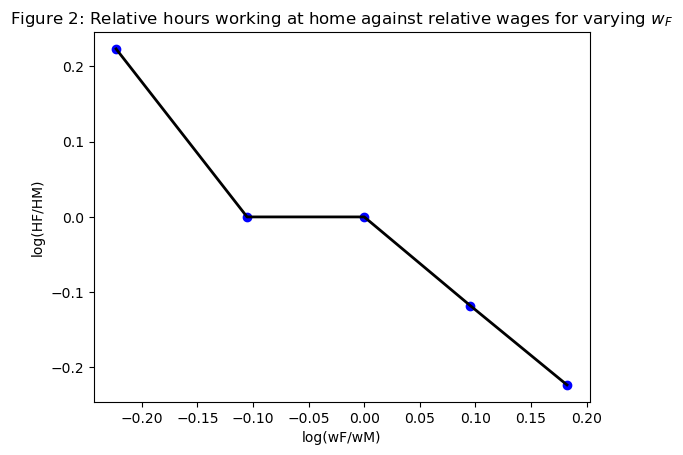

In [121]:
# 1. Create an instance of the HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# 2. Define the vector of wage rates
for wF in model.par.wF_vec:
    model.par.wF = wF
    optimum = model.solve_discrete()
    log_HFM = np.log(optimum.HF/optimum.HM)
    log_Hratio = np.append(log_Hratio, log_HFM)
    log_wF = np.log(wF/model.par.wM)
    log_wratio = np.append(log_wratio, log_wF)
    print(f' For Wf = {model.par.wF:.2f}: HF = {optimum.HF:.2f}, HM = {optimum.HM:.2f}, and log(HF/HM) = {log_HFM:2f}')
           
# 3. Create an empty array to store the optimal labor supply
temp_ratio= np.zeros_like(wf)

# 4. Loop over the wage rates and find the optimal labor supply
for i, wage in enumerate(wf):
    model.par.wF = wage
    opt = model.solve_discrete()
    ratio = opt.HF/opt.HM
    temp_ratio[i]=ratio
   
# 5. Plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.log(wf), np.log(temp_ratio), color='black', lw=2) # the famale wage is equal to the relative becuase wM = 1
plt.xlabel("log(wF/wM)")
plt.ylabel("log(HF/HM)")
plt.title("Figure 2: Relative hours working at home against relative wages for varying $w_F$")

# 6. Add data points
x_data = np.log(np.linspace(0.8, 1.2, 5))
y_data = np.log(temp_ratio[:5])
plt.scatter(x_data, y_data, color='blue')

# 7. Show the graph
plt.show()

The figure shows that as the ratio of female wage (wF) to male wage (wM) increases, the ratio of female household work (HF) to male household word (HM) decreases. The plot illustrates the relationship between the logarithm of relative home production and the logarithm of relative wages. It demonstrates that when the wage ratio increases, the amount of household work carried out by females decreases. This is because it becomes more advantageous for females to work in the job market where they receive relatively higher wages.

However, in the case of discrete time, we observe that for certain values of $\alpha$ and $\sigma$, there is no change in the ratio. This is because the optimal choice for household work can only be altered by a limited amount when the choice set is discrete.

# Question 3 #

Now we assume that time is continous rather than discrete, in order to fix the error from discrete time. This implies that there is an infinite number of possibilities for the choice set.

We plot the same logarithmic functions:
$$ log\frac{H_F}{H_M} log\frac{w_F}{w_M}$$

In [122]:
model3 = HouseholdSpecializationModelClass()

# Define empty vectors of log(HF/HM) and log(wF/wM)
log_Hratio = []
log_wratio = []

# Calculate values of log(HF/HM) and log(wF/wM) and append values to their respective vectors
for wF in model3.par.wF_vec:
    model3.par.wF = wF
    optimum = model3.solve()
    log_HFM = np.log(optimum.HF/optimum.HM)
    log_Hratio = np.append(log_Hratio, log_HFM)
    log_wF = np.log(wF/model3.par.wM)
    log_wratio = np.append(log_wratio, log_wF)
    print(f' For Wf = {model3.par.wF:.2f}: HF = {optimum.HF:.2f}, HM = {optimum.HM:.2f}, and log(HF/HM) = {log_HFM:2f}')

 For Wf = 0.80: HF = 5.12, HM = 4.09, and log(HF/HM) = 0.223147
 For Wf = 0.90: HF = 4.75, HM = 4.27, and log(HF/HM) = 0.105352
 For Wf = 1.00: HF = 4.45, HM = 4.45, and log(HF/HM) = -0.000008
 For Wf = 1.10: HF = 4.22, HM = 4.64, and log(HF/HM) = -0.095311
 For Wf = 1.20: HF = 4.03, HM = 4.83, and log(HF/HM) = -0.182316


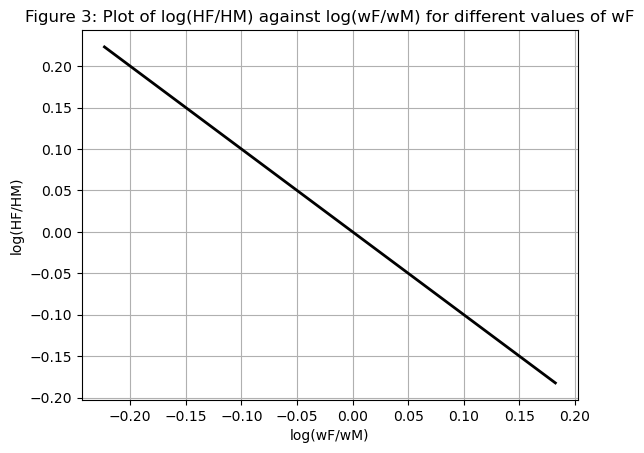

In [123]:
# creating figure
fig = plt.figure()
# creating plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(log_wratio, log_Hratio, color='black', lw=2)
# making alterations to the figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Figure 3: Plot of log(HF/HM) against log(wF/wM) for different values of wF")
plt.show()

The figure presents the same results as in question 2, but with the introduction of continuous time, the graph appears much smoother. Additionally, the results are more precise and accurate

# Question 4 #

Using the function estimate(), we estimate the values of $\alpha$ and $\sigma$ which minimizes the following expression:

 $$ (\beta - \hat{\beta}_{0})^2 + (\beta_1 - \hat{\beta}_{1})^2 $$

(alpha, sigma) = (0.982024584141505, 0.09998334897627222)


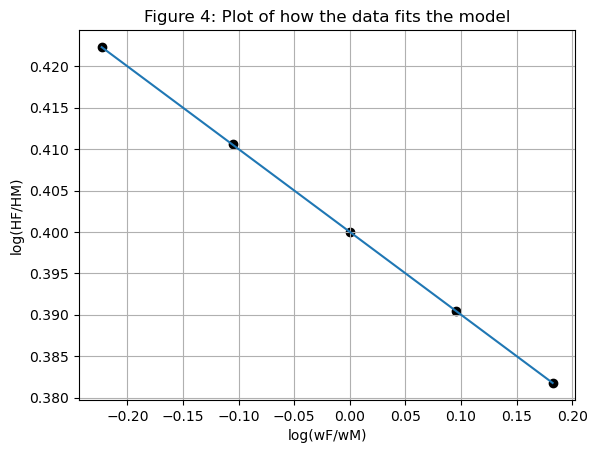

In [124]:
model4 = HouseholdSpecializationModelClass()
model4.estimate()
print(f'(alpha, sigma) = {model4.estimate()}')

# including minimizing alpha and sigma
log_Hratio = []
log_wratio =[]

for wF in model4.par.wF_vec:
    model4.par.wF = wF
    optimum = model4.solve()
    log_HFM = np.log(optimum.HF/optimum.HM)
    log_Hratio = np.append(log_Hratio, log_HFM)
    log_wF = np.log(wF/model4.par.wM)
    log_wratio = np.append(log_wratio, log_wF)


# Siminski and Yetsenga's regression line
def f(log_wratio):
    return 0.4 +(-0.1)*log_wratio


# creating the figure
fig = plt.figure()
# creating the plot
ax = fig.add_subplot(1, 1, 1)
ax.plot(log_wratio, f(log_wratio))
ax.scatter(log_wratio, log_Hratio, color='black')

# making alterations to the figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Figure 4: Plot of how the data fits the model")
plt.show()

From the plot above, we observe a strong fit between the model and the data. The optimal value of $\alpha$ is found to be $0.982$, indicating that women are more productive in household work compared to men. As a result, it is logical for women to undertake a larger share of household tasks due to their higher productivity. The fact that the minimizing value of $\alpha$ is not equal to $0.5$ suggests that the relative distribution of hours worked at home between men and women is influenced by $\sigma$ as well.

# Question 5 #

The human capital theory states that individuals who invest more in human capital, such as through education and/or gaining professional experience, will also increase their productivity and consequently their marginal product. This leads to higher income levels. The theory is relevant in relation to the effect of having a child because during the maternity or paternity leave period, individuals are unable to accumulate additional professional experience. As a result, the investment in human capital stagnates during the time the individual is away from the labor market. In Denmark, women predominantly take parental leave, which can lead to a gender wage gap.

To expand the model, we will examine the effect of parental leave on women's wage levels by assuming a 5% decrease in women's income due to maternity leave.

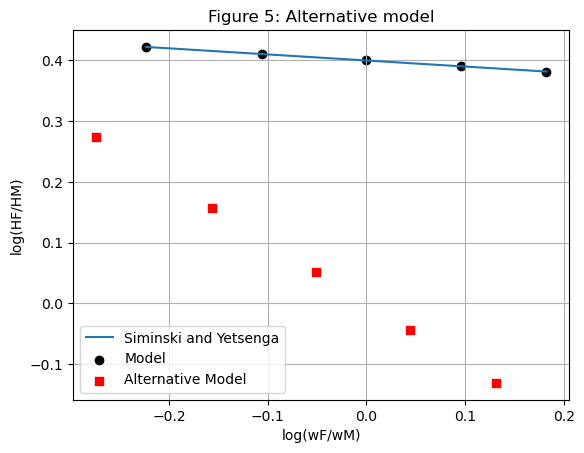

In [125]:
model.par.wF_vec = model.par.wF_vec*0.95

log_AltHratio = []
log_Altwratio =[]

for wF in model.par.wF_vec:
    model.par.wF = wF
    optimum = model.solve()
    log_AltHFM = np.log(optimum.HF/optimum.HM)
    log_AltHratio = np.append(log_AltHratio, log_AltHFM)
    log_AltwF = np.log(wF/model.par.wM)
    log_Altwratio = np.append(log_Altwratio, log_AltwF)

# create figure
fig = plt.figure()
# create plot
ax = fig.add_subplot(1, 1, 1)
# plot Siminski and Yetsenga's results as line
ax.plot(log_wratio, f(log_wratio), label="Siminski and Yetsenga")
# plot original model's results as scatter dots
ax.scatter(log_wratio, log_Hratio, label="Model",color='black')
# plot alternative model's results as scatter squares
ax.scatter(log_Altwratio, log_AltHratio, label="Alternative Model", marker='s',color='red')


# alterations to figure
ax.grid()
ax.set_xlabel("log(wF/wM)")
ax.set_ylabel("log(HF/HM)")
ax.set_title("Figure 5: Alternative model")
ax.legend()
plt.show()


Figure 5 shows that the alternative model, where womens wages are 5% lower than previously does not fit the Siminski and Yetsenga estimates. 